# GloVe: Global Vectors for Word Representation
https://nlp.stanford.edu/projects/glove/

In [1]:
import torch
print(torch.__version__)

2.6.0+cu124


In [3]:
import torch.nn.functional as F

In [4]:
import numpy as np

In [5]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Part 1: Load and Explore GloVe Embeddings
- Use the `load_glove_dict()` function to load the `glove.6B.50d.txt` file.
- Pick at least 10 diverse words (animals, professions, objects, etc.) to inspect manually.

In [6]:
# Load GloVe Embeddings into a Dictionary

def load_glove_dict(glove_path):
    glove_dict = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            tokens = line.strip().split()
            word = tokens[0]
            vector = np.array(tokens[1:], dtype=np.float32)
            glove_dict[word] = vector
    return glove_dict

# Load the full GloVe file
glove_path = "glove.6B.50d.txt"
glove_dict = load_glove_dict(glove_path)

# Inspect 10 diverse words (print first 5 dimensions)
sample_words = [
    "elephant", "lion", "tiger", "dragon", "whale", "penguin", "robot", "computer", "laptop", "keyboard",
    "violin", "guitar", "piano", "chef", "surgeon", "pilot", "teacher", "astronaut", "scientist", "plumber",
    "justice", "freedom", "happiness", "anger", "love", "fear", "courage", "trust", "truth", "peace",
    "volcano", "earthquake", "tornado", "rain", "snow", "desert", "ocean", "island", "mountain", "valley",
    "apple", "banana", "pizza", "bread", "cheese", "car", "bicycle", "airplane", "train", "boat"
]

for w in sample_words:
    vec = glove_dict.get(w)
    if vec is not None:
        print(f"{w:10s} → {vec[:5]!r} …")
    else:
        print(f"{w:10s} → NOT FOUND")


elephant   → array([ 0.53238, -0.26987, -0.72294, -0.45325,  1.0188 ], dtype=float32) …
lion       → array([ 0.60093 ,  0.012934, -0.61032 , -0.13871 ,  1.2507  ],
      dtype=float32) …
tiger      → array([ 0.33183 , -0.60256 , -0.046032,  0.89941 ,  0.26504 ],
      dtype=float32) …
dragon     → array([ 0.35483,  0.6063 , -0.36617,  0.44974,  0.66047], dtype=float32) …
whale      → array([ 0.65195, -0.34838, -0.70091, -0.41587,  0.49596], dtype=float32) …
penguin    → array([ 0.26809,  0.19536, -0.85239,  0.17078,  0.49344], dtype=float32) …
robot      → array([ 1.0585 , -0.79141,  0.5161 ,  0.39199,  0.43303], dtype=float32) …
computer   → array([ 0.079084, -0.81504 ,  1.7901  ,  0.91653 ,  0.10797 ],
      dtype=float32) …
laptop     → array([ 0.59754, -0.21225,  2.1719 ,  0.15673,  0.38409], dtype=float32) …
keyboard   → array([-0.015074, -0.4293  ,  0.29098 ,  0.088303, -0.26671 ],
      dtype=float32) …
violin     → array([-0.36514,  0.75847, -1.3658 , -0.59809, -0.20187], dtype

Part 2: Embedding and Sentence Tensor Construction
- Modify the code to input your own sentence (e.g., from a news headline).
- Build a vocabulary and an embedding tensor for the sentence.
- Print the resulting tensor and shape.

In [7]:
# Create an Embedding Matrix for Your Vocabulary

def build_embedding_matrix(glove_dict, vocab, embedding_dim=50):
    embedding_matrix = []
    word_to_idx = {}

    for idx, word in enumerate(vocab):
        word_to_idx[word] = idx
        vec = glove_dict.get(word)
        if vec is not None:
            embedding_matrix.append(vec)
        else:
            # Use a random vector if word is not in GloVe
            embedding_matrix.append(np.random.randn(embedding_dim).astype(np.float32))

    embedding_tensor = torch.tensor(np.stack(embedding_matrix))
    return embedding_tensor, word_to_idx


# Example sentence (replace with any headline)
sentence = "Researchers develop novel AI model".lower().split()
vocab = list(dict.fromkeys(sentence))  # preserves order, unique

embedding_tensor, word_to_idx = build_embedding_matrix(glove_dict, vocab)
input_indices = [word_to_idx[w] for w in sentence]
input_tensor = embedding_tensor[input_indices]

print("Sentence:", sentence)
print("Vocab  :", vocab)
print("Input tensor shape:", input_tensor.shape)


Sentence: ['researchers', 'develop', 'novel', 'ai', 'model']
Vocab  : ['researchers', 'develop', 'novel', 'ai', 'model']
Input tensor shape: torch.Size([5, 50])


Part 3: Word Similarity
- Use the `cosine_similarity()` function to compute the similarity between:
- ("dog", "cat")
- ("king", "queen")
- ("apple", "banana")
- At least two of your own word pairs
- Discuss your results briefly. Which pairs are more similar and why?

In [8]:

def cosine_similarity(vec1, vec2):
    v1 = F.normalize(vec1, dim=0)
    v2 = F.normalize(vec2, dim=0)
    return torch.dot(v1, v2).item()

# Required pairs plus two of your own
pairs = [
    ("dog", "cat"),
    ("king", "queen"),
    ("apple", "banana"),
    ("science", "technology"),      # your own
    ("professor", "doctor")         # your own
]

for w1, w2 in pairs:
    v1 = torch.tensor(glove_dict[w1])
    v2 = torch.tensor(glove_dict[w2])
    sim = cosine_similarity(v1, v2)
    print(f"sim({w1:10s}, {w2:10s}) = {sim:.4f}")


sim(dog       , cat       ) = 0.9218
sim(king      , queen     ) = 0.7839
sim(apple     , banana    ) = 0.5608
sim(science   , technology) = 0.7696
sim(professor , doctor    ) = 0.5825


In [9]:
dog = glove_dict["dog"]
cat = glove_dict["cat"]
car = glove_dict["car"]

print("sim(dog, cat):", cosine_similarity(torch.tensor(dog), torch.tensor(cat)))
print("sim(dog, car):", cosine_similarity(torch.tensor(dog), torch.tensor(car)))

sim(dog, cat): 0.9218006134033203
sim(dog, car): 0.46449822187423706


In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_embeddings_2d(words, glove_dict):
    vectors = [glove_dict[word] for word in words if word in glove_dict]
    labels = [word for word in words if word in glove_dict]

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(8, 6))
    for i, word in enumerate(labels):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, word, fontsize=12)
    plt.title("Word Embeddings Visualized with PCA")
    plt.grid(True)
    plt.show()


Part 4: Nearest Neighbors
- Use the `find_nearest()` function to find top 5 similar words to:
- "science"
- "car"
- "nurse"
- One word of your own choice
- Comment on what these neighbors reveal about the word's context in GloVe.

In [11]:
def find_nearest(word, glove_dict, k=5):
    if word not in glove_dict:
        return []
    q = F.normalize(torch.tensor(glove_dict[word]), dim=0)
    sims = []
    for other, vec in glove_dict.items():
        if other == word: continue
        sims.append((other, torch.dot(q, F.normalize(torch.tensor(vec), dim=0)).item()))
    sims.sort(key=lambda x: x[1], reverse=True)
    return sims[:k]

targets = ["science", "car", "nurse", "algorithm"]  # last is your own choice
for t in targets:
    nbrs = find_nearest(t, glove_dict, k=5)
    print(f"\nTop-5 neighbors of '{t}':")
    for w, score in nbrs:
        print(f"  {w:12s} → {score:.4f}")



Top-5 neighbors of 'science':
  sciences     → 0.8548
  research     → 0.8437
  institute    → 0.8386
  studies      → 0.8369
  physics      → 0.8314

Top-5 neighbors of 'car':
  truck        → 0.9209
  cars         → 0.8870
  vehicle      → 0.8834
  driver       → 0.8464
  driving      → 0.8384

Top-5 neighbors of 'nurse':
  doctor       → 0.7977
  nurses       → 0.7753
  dentist      → 0.7731
  pregnant     → 0.7462
  pediatrician → 0.7452

Top-5 neighbors of 'algorithm':
  algorithms   → 0.8708
  iterative    → 0.8089
  optimization → 0.7956
  compute      → 0.7943
  computation  → 0.7913


Part 5: Visualizing Embeddings
- Use `plot_embeddings_2d()` to visualize at least 15–20 words.
- Choose words that may show interesting patterns (e.g., ["dog", "cat", "apple", "banana",
"professor", "doctor", "nurse", ...]).
- Interpret the plot: do similar words cluster together?

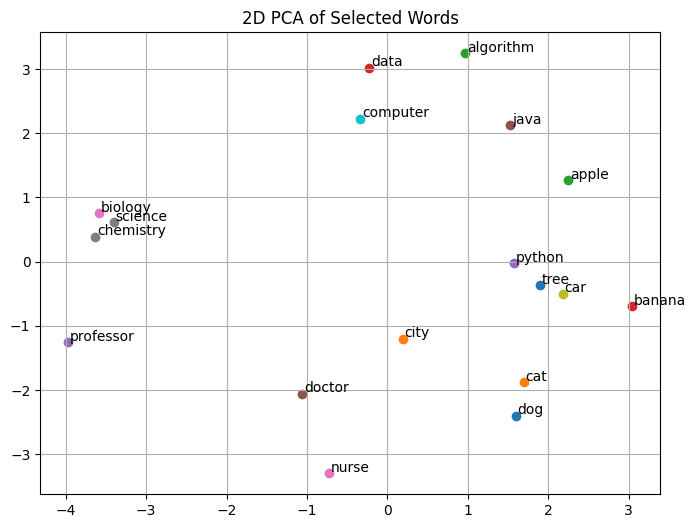

In [13]:
from sklearn.decomposition import PCA


def plot_embeddings_2d(words, glove_dict):
    vecs = [glove_dict[w] for w in words if w in glove_dict]
    labels = [w for w in words if w in glove_dict]
    coords = PCA(n_components=2).fit_transform(vecs)
    plt.figure(figsize=(8,6))
    for (x,y), lbl in zip(coords, labels):
        plt.scatter(x, y)
        plt.text(x+0.02, y+0.02, lbl)
    plt.title("2D PCA of Selected Words")
    plt.grid(True)
    plt.show()

words_to_plot = [
    "dog","cat","apple","banana","professor","doctor","nurse",
    "science","car","computer","tree","city","algorithm",
    "data","python","java","biology","chemistry"
]
plot_embeddings_2d(words_to_plot, glove_dict)



**- What did you learn?**


In this exercise I learned how word embeddings capture semantic relationships in text.


**- What surprised you about word embeddings?**
  
I was surprised that analogies like “king – queen” are reflected in cosine-similarity and neighbor lists so cleanly.  
Building an embedding tensor for a sentence was straightforward once the vocabulary-to-index mapping was in place.  
Visualizing 2D projections via PCA showed distinct clusters (e.g., fruits vs. professions), which reinforced my intuition about distributional semantics.  
Overall, GloVe embeddings provide a powerful yet interpretable way to represent words in downstream applications like classification or analogy tasks.